
# K Nearest Neighbors Algorithm 

The dataset is classified dataset from a company! The column names of the dataset are hidden due to  security issues. The features and the target classes are provided. 

The aim  of the project is to create a model that directly predicts a class for a new data point based on the given features. Here I tried to used the ML algorithms KNN to create a model that directly predicts a class for a new data point.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics 
%matplotlib inline


In [2]:
File_name='F:\\ML Projects\Knn\Classified.csv'


In [3]:
df=pd.read_csv(File_name, index_col=0)

In [4]:
pd.pandas.set_option('display.max_columns', None)

In [5]:
df.head()

,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
WTT,,,,,,,,,,
0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
df.shape


(1000, 10)

# Standardize the Variables

In order to use KNN algorithms we need standardize the features because the KNN classifier predicts the class of a given test observation by identifying the  nearest observations. Therefore, the scale of the variables effects the prediction quality and processing time. Therefore, variables that are on a large scale will have a much larger effect on the KNN classifier than variables that are on a small scale.
To scale down the variables I used StandardScaler from sklearn lib.


In [7]:
from sklearn.preprocessing import StandardScaler 

In [8]:
scaler=StandardScaler()

In [9]:
scaler.fit(df.drop("TARGET CLASS", axis=1))

StandardScaler()

In [10]:
scaled_data=scaler.transform(df.drop("TARGET CLASS", axis=1))

In [11]:
df_feature=pd.DataFrame(scaled_data, columns=df.columns[:-1])
df_feature.head()

,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


#### Analysis to understand the relationship between the variables

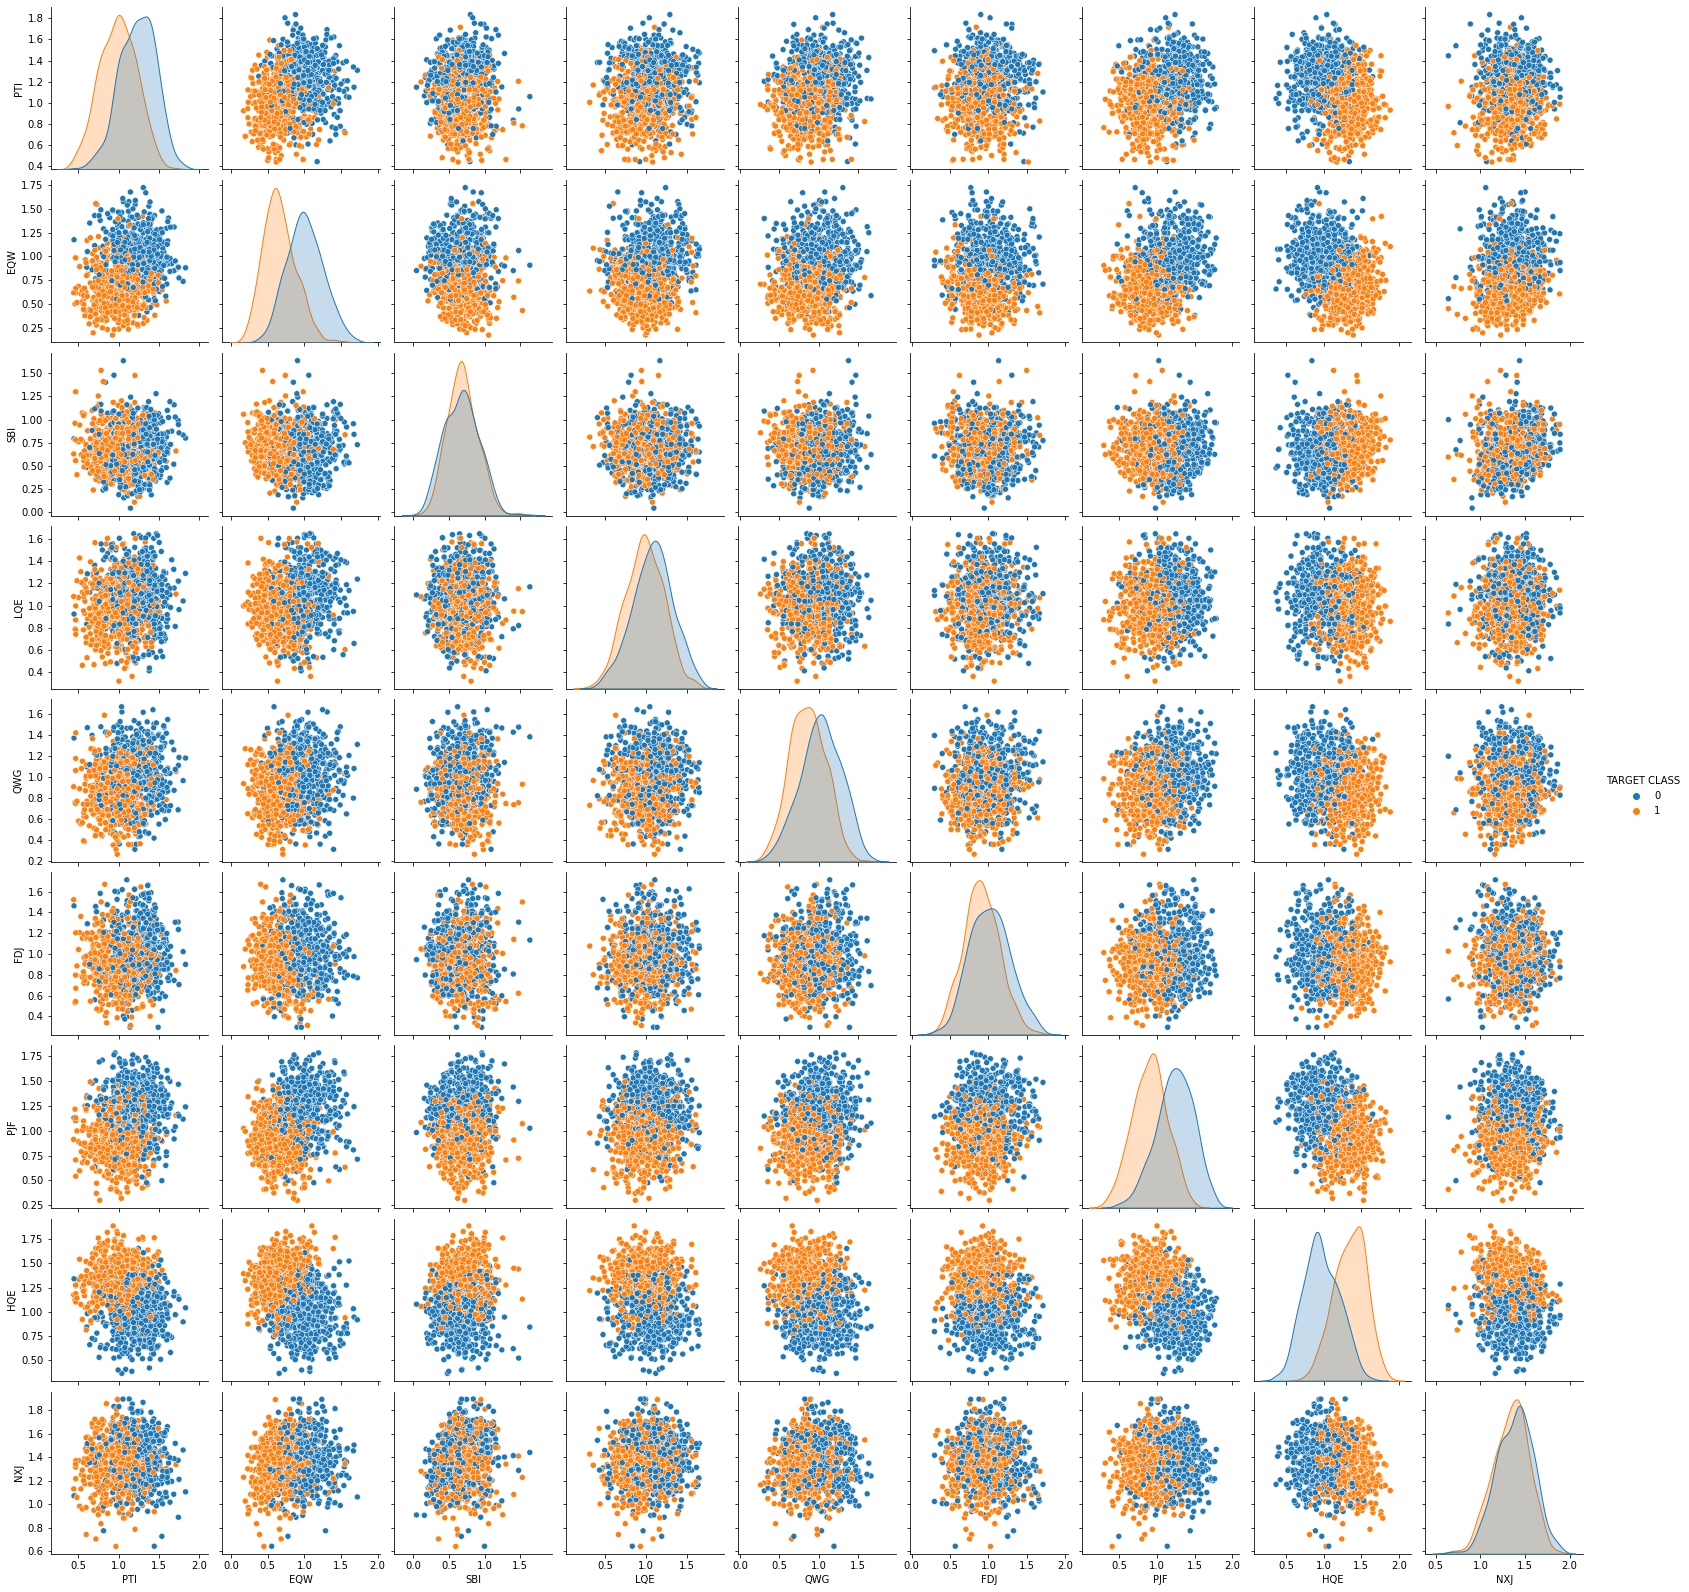

In [12]:
sns.pairplot(df, hue="TARGET CLASS")

####  Analysis of  the features by plotting histograms to understand the distribution of the variables

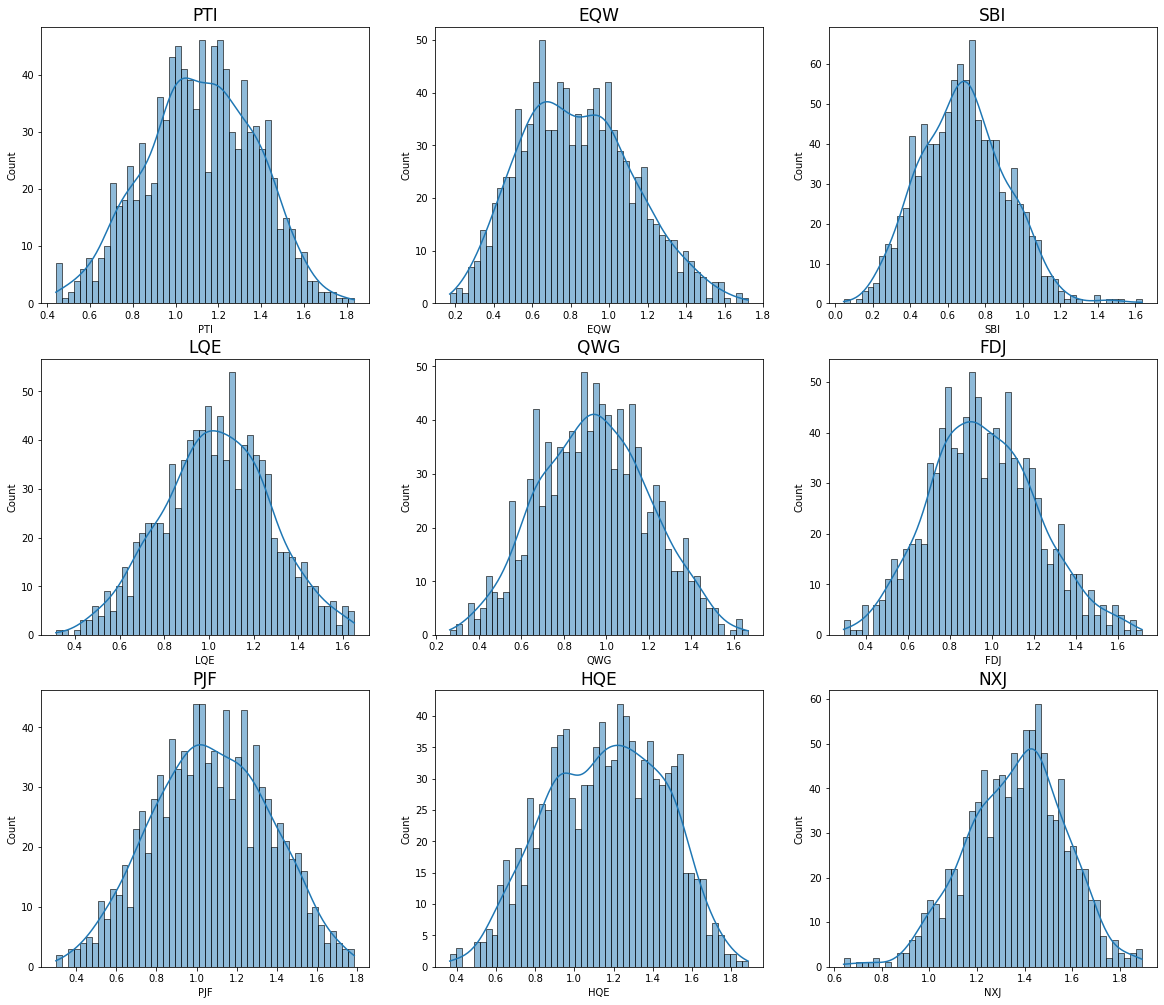

In [13]:
plt.figure(figsize=(20, 60))
for n, col in enumerate(df.drop('TARGET CLASS',axis=1).columns):
    plt.subplot(10,3,n+1)
    sns.histplot(df[col] ,bins=50, kde=True)
    plt.title(col, fontsize=17)
plt.show()

In [14]:
# Splitting the train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feature,df['TARGET CLASS'],
                                                    test_size=0.30)


# Using KNN 

The goal is to build a model to predict wheter new data point will be TARGET CLASS. First I start with k =1


In [15]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

In [16]:
pred = knn.predict(X_test)

# Predictions and Evaluations



In [17]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [18]:
print(confusion_matrix(y_test,pred))


[[133  15]
 [ 18 134]]


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       148
           1       0.90      0.88      0.89       152

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [20]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feature,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())



In [21]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feature,df['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())

In [22]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

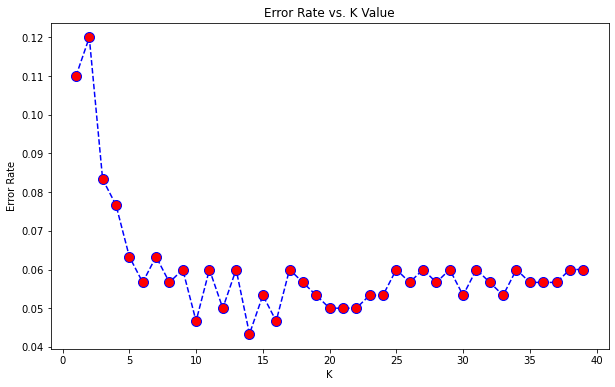

In [23]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         #markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Text(0, 0.5, ' accuracy Rate')

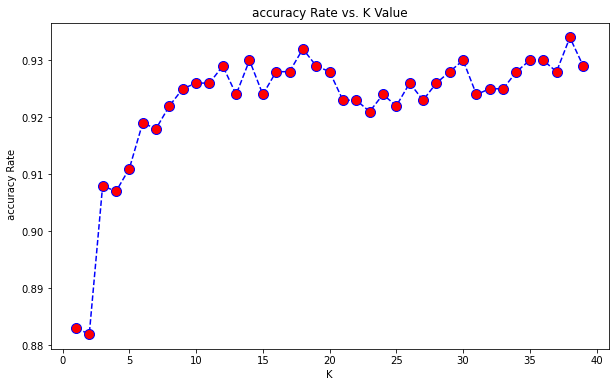

In [24]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel(' accuracy Rate')



### Here we can see that that after arounds K>23 the error rate just tends to vary around 0.06-0.05 . Therefore, I train the model with k=23 that and check the classification report!


In [25]:
import sklearn.metrics as metrics
def Plot_confusion_matrix(y, pred):
     cm = metrics.confusion_matrix(y_test, pred)
     plt.clf()
     plt.imshow(cm, cmap=plt.cm.Accent)
     categoryNames = ['Class 1','Class 0']
     plt.title(f'Confusion Matrix')
     plt.ylabel('True labels')
     plt.xlabel('Predicted labels')
     ticks = np.arange(len(categoryNames))
     plt.xticks(ticks, categoryNames, rotation=45)
     plt.yticks(ticks, categoryNames)
     s = [['TN','FP'], ['FN', 'TP']]
  
     for i in range(2):
         for j in range(2):
              plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]),fontsize=12)
     plt.show()

WITH K=1




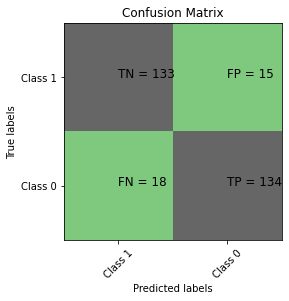

None


              precision    recall  f1-score   support

           0       0.88      0.90      0.89       148
           1       0.90      0.88      0.89       152

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [26]:
# let's check classification report with ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(Plot_confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))


WITH K=23




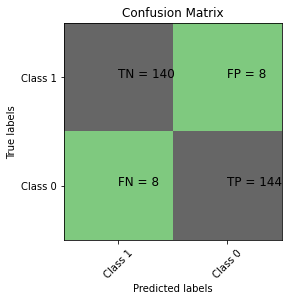

None


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       148
           1       0.95      0.95      0.95       152

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [27]:
# let's check classification report with ORIGINAL K=30
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred_fnl = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(Plot_confusion_matrix(y_test, pred_fnl))
print('\n')
print(classification_report(y_test,pred_fnl))

####  The prediction has considerably improved after setting K value as 23.